In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
DEBUG=False

In [4]:
import sys
while '/home/ashesh.ashesh/code/Disentangle' in sys.path:
    sys.path.remove('/home/ashesh.ashesh/code/Disentangle')
sys.path.append('/home/ashesh.ashesh/code/ekin/ekin_denoiSplit/')

In [5]:
%run ./nb_core/root_dirs.ipynb
setup_syspath_disentangle(DEBUG)
%run ./nb_core/disentangle_imports.ipynb

DATA_ROOT:	 /group/jug/ashesh/data/
CODE_ROOT:	 /home/ashesh.ashesh/


In [6]:
nmodel_dir = '/home/ashesh.ashesh/training/noise_model/2403/11'
# nmodel_dir = '/home/ashesh.ashesh/training/noise_model/2402/61'

histnoisemodel_fpath = None
gmmnoisemodel_fpath = None
for fname in os.listdir(nmodel_dir):
    if fname.startswith('HistNoiseModel'):
        assert histnoisemodel_fpath is None
        histnoisemodel_fpath = os.path.join(nmodel_dir, fname)
    elif fname.startswith('GMMNoiseModel'):
        assert gmmnoisemodel_fpath is None
        gmmnoisemodel_fpath = os.path.join(nmodel_dir, fname)
print(gmmnoisemodel_fpath)
print(histnoisemodel_fpath)

/home/ashesh.ashesh/training/noise_model/2403/11/GMMNoiseModel_lowres-230730ER111S24mGFP_sectionB3_GFP488_post4xM_stack1_230725__6_4_Clip0.0-1.0_Sig0.125_UpNone_Norm0_bootstrap.npz
/home/ashesh.ashesh/training/noise_model/2403/11/HistNoiseModel_lowres-230730ER111S24mGFP_sectionB3_GFP488_post4xM_stack1_230725__Norm0_Bins128_bootstrap.npy


In [7]:
from denoisplit.nets.gmm_noise_model import GaussianMixtureNoiseModel
from denoisplit.nets.hist_noise_model import HistNoiseModel

# gmmnoisemodel_fpath = '/home/ashesh.ashesh/training/noise_model/2402/62/GMMNoiseModel_CCPs-GT_all.mrc__6_4_Clip0.0-1.0_Sig0.125_UpNone_Norm0_bootstrap.npz'
# histnoisemodel_fpath = os.path.join(os.path.dirname(gmmnoisemodel_fpath), 'HistNoiseModel_CCPs-GT_all.mrc__Norm0_Bins128_bootstrap.npy')
# datadir = '/group/jug/ashesh/data/ventura_gigascience/actin-60x-noise2-highsnr.tif' if 'actin' in os.path.basename(gmmnoisemodel_fpath) else '/group/jug/ashesh/data/ventura_gigascience/mito-60x-noise2-highsnr.tif'


In [8]:
nmodel_params = np.load(gmmnoisemodel_fpath)
gmm_model = GaussianMixtureNoiseModel(params=nmodel_params)
histdata = np.load(histnoisemodel_fpath)
hist_model = HistNoiseModel(histdata)
bins = histdata.shape[-1]

13823.196271896362

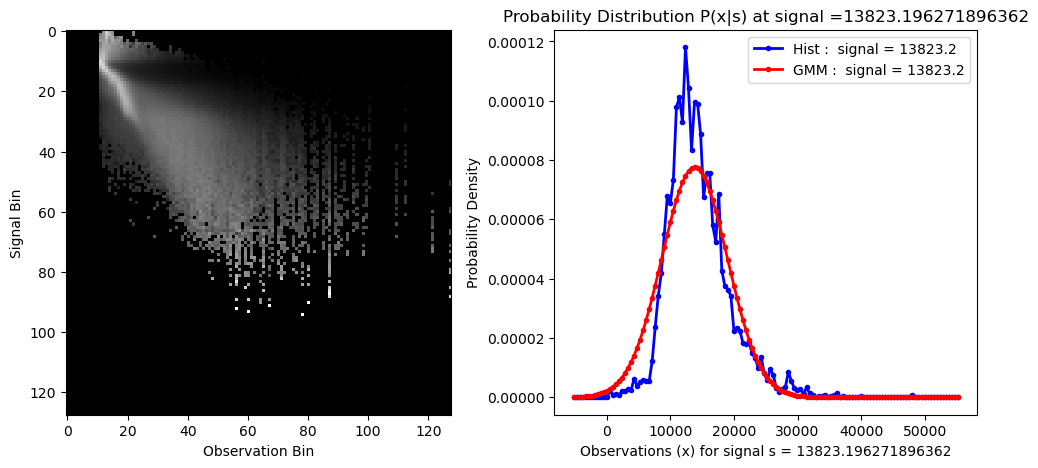

In [11]:
from denoisplit.utils import plotProbabilityDistribution
signalBinIndex= 40
data_dict = plotProbabilityDistribution(signalBinIndex=signalBinIndex, 
                            histogramNoiseModel=hist_model,
                            gaussianMixtureNoiseModel=gmm_model,
                            device='cpu')
data_dict['gmm']['x'][data_dict['gmm']['p'].argmax()]